In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bz2
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_curve
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import seaborn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import nltk
# nltk.download()
#call the nltk downloader
from nltk.stem import PorterStemmer
from sklearn.model_selection import GridSearchCV
%matplotlib inline

## Reading Data


In [2]:
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0


In [3]:
df = df.dropna()
df['Sentiment'] = ''
# df['Sentiment'] = np.where(df['Rating'] > 3, 'Pos')
# df['Sentiment'] = np.where(df['Rating'] < 3, 'Neg')
# df['Sentiment'] = np.where(df['Rating'] == 3, 'Neutral')
df.loc[df['Rating'] > 3, 'Sentiment'] = df.loc[df['Rating'] > 3, 'Sentiment'].replace('', 'Positive')
df.loc[df['Rating'] < 3, 'Sentiment'] = df.loc[df['Rating'] < 3, 'Sentiment'].replace('', 'Negative')
df.loc[df['Rating'] == 3, 'Sentiment'] = df.loc[df['Rating'] == 3, 'Sentiment'].replace('', 'Neutral')
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,Positive
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,Positive
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Positive
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,Positive
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Positive


## if you want to use only positive and negative class then use the code below and comment the one in above cell

In [4]:
# df = df.dropna(inplace=True) #drop null 
# df = df[df['Rating'] != 3] #drop neutral rating
# #encode 4,5 as 1 for positive sentiment & 1,2 as 0 for negative sentiment
# df['Sentiment'] = np.where(df['Rating'] > 3, 1, 0)
# df.head()

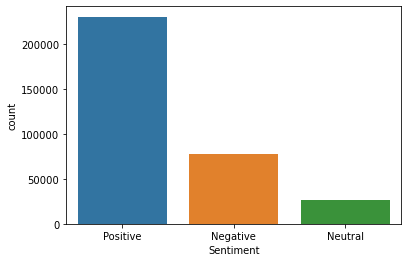

In [5]:
seaborn.countplot(df['Sentiment'])

In [6]:
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
porter = PorterStemmer()
def normalize_texts(texts):
    normalized_texts = []
    for text in texts:
        lower = text.lower()
        no_punctuation = NON_ALPHANUM.sub(r' ', lower)
        no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
        dede = porter.stem(no_non_ascii.strip())
        normalized_texts.append(dede)
    return normalized_texts
        
reviews = normalize_texts(df['Reviews'])

In [7]:
reviews = np.array(reviews[:10000])
reviews.shape

(10000,)

In [8]:
len(reviews)

10000

## Making vectorizers

In [9]:
corpus = {}
for doc in reviews:
    for w in doc.split():
        if w not in corpus:
            corpus[w]=len(corpus)

In [10]:
X = []
for doc in reviews:
    count = {}
    vector = np.zeros(len(corpus))
    for w in doc.split():
        if w not in count:
            count[w]=1
        else:
            count[w]+=1
    for k, v in count.items():
        index = corpus[k]
        vector[index]=v
    X.append(vector)

In [11]:
X3 = np.array(X)

## Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X3, df['Sentiment'][:10000], test_size=0.10, 
                                                    random_state = 342, stratify = df['Sentiment'][:10000])

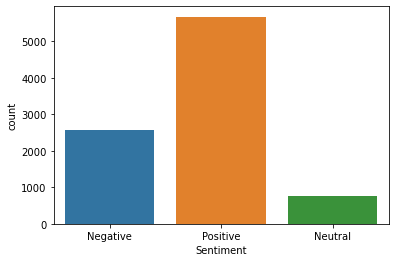

In [13]:
seaborn.countplot(y_train)

## Naive bayes

In [14]:
parameters = {'alpha':[0.01,0.0001,0.1,1, 0.05, 0.5] }
clf = MultinomialNB()
clf = GridSearchCV(clf, parameters, cv =5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.0001, 0.1, 1, 0.05, 0.5]})

In [15]:
print("Best cross-validation accuracy: {:.2f}".format(clf.best_score_))
print("Test set score: {:.2f}".format(clf.score(X_test, y_test)))
print("Best parameters: {}".format(clf.best_params_))

Best cross-validation accuracy: 0.86
Test set score: 0.86
Best parameters: {'alpha': 0.01}


In [16]:
y_pred_nv = clf.predict(X_test)

In [17]:
for i, j in zip(y_test, y_pred_nv):
    print("actual:", i, " pred:", j)

actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Negative
actual: Positive  pred: Positive
actual: Neutral  pred: Neutral
actual: Negative  pred: Negative
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Neutral  pred: Negative
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Negative
actual: Negative  pred: Negative
actual: Positive  pred: Positive
actual: Negative  pred: Negative
actual: Negative  pred: Negative
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Negative
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negat

actual: Negative  pred: Neutral
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Negative
actual: Neutral  pred: Positive
actual: Neutral  pred: Positive
actual: Neutral  pred: Positive
actual: Negative  pred: Negative
actual: Negative  pred: Neutral
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Negative
actual: Positive  pred: Negative
actual: Positive  pred: Positive
actual: Negative  pred: Negative
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Negative
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Negative
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positiv

actual: Positive  pred: Positive
actual: Negative  pred: Negative
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Negative
actual: Positive  pred: Positive
actual: Negative  pred: Negative
actual: Neutral  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Negative
actual: Negative  pred: Negative
actual: Positive  pred: Positive
actual: Negative  pred: Negative
actual: Positive  pred: Positive
actual: Neutral  pred: Neutral
actual: Positive  pred: Positive
actual: Positive  pred: Negative
actual: Neutral  pred: Negative
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Neutral  pred: Positive
actual: Neutral  pred: Negative
actual: Neutral 

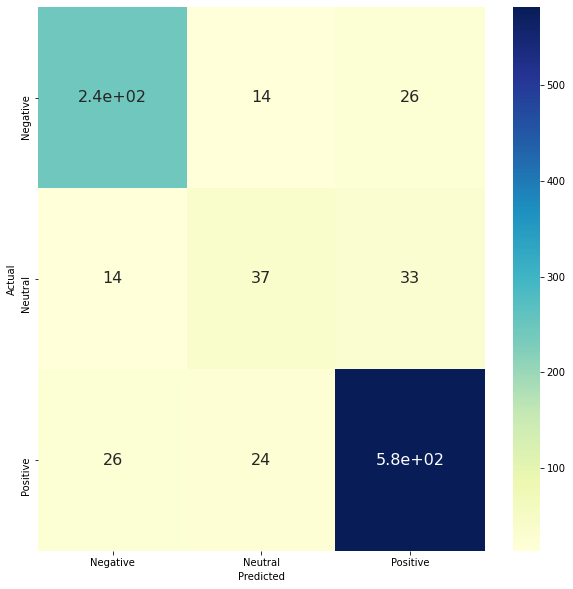

In [18]:
conf_mat = confusion_matrix(y_test, y_pred_nv)
df_cm = pd.DataFrame(conf_mat, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
seaborn.heatmap(df_cm,cmap= "YlGnBu", annot=True,annot_kws={"size": 16})
# # plt.savefig("bayes confusion")

In [19]:
print(classification_report(y_test, y_pred_nv))

              precision    recall  f1-score   support

    Negative       0.86      0.86      0.86       285
     Neutral       0.49      0.44      0.47        84
    Positive       0.91      0.92      0.91       631

    accuracy                           0.86      1000
   macro avg       0.75      0.74      0.75      1000
weighted avg       0.86      0.86      0.86      1000



## Random Forest

In [20]:
parameters = {'n_estimators':[10,100,200],  'max_depth':[2,3,4]}

clf = RandomForestClassifier()

clf = GridSearchCV(clf, parameters, cv =5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4],
                         'n_estimators': [10, 100, 200]})

In [21]:
print("Best cross-validation accuracy: {:.2f}".format(clf.best_score_))
print("Test set score: {:.2f}".format(clf.score(X_test, y_test)))
print("Best parameters: {}".format(clf.best_params_))

Best cross-validation accuracy: 0.64
Test set score: 0.64
Best parameters: {'max_depth': 4, 'n_estimators': 10}


In [22]:
y_pred_rf = clf.predict(X_test)
for i, j in zip(y_test, y_pred_rf):
    print("actual:", i, " pred:", j)

actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Positive  pred: Positive
actual: Neutral  pred: Positive
actual: Negative  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Neutral  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Negative  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Negative  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Nega

actual: Negative  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Negative  pred: Positive
actual: Negative  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Neutral  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Neutral  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Negative  pred: Negative
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Nega

actual: Negative  pred: Positive
actual: Negative  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Negative  pred: Positive
actual: Negative  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Negative  pred: Positive
actual: Neutral  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Neutral  pred: Positive
actual: Neutral  pred: Positive
actual: Negative  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Negative  pred: Negative
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Negative  pred: Positive
actual: Negative  pred: Positive
actual: Negative  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Positive  pred: Positive
actual: Posit

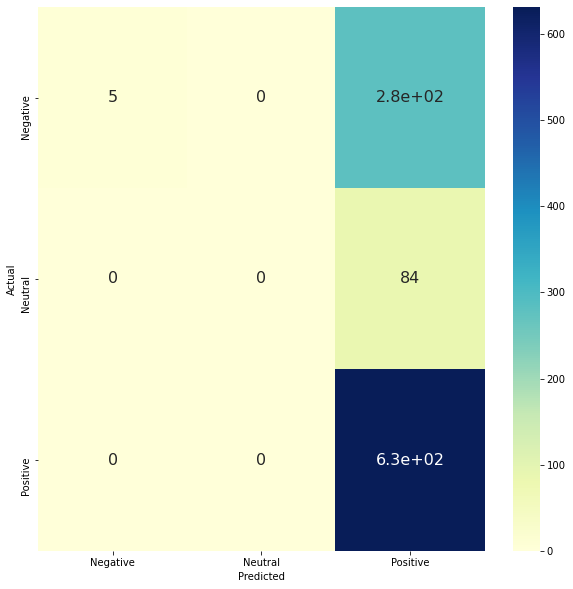

In [23]:
conf_mat = confusion_matrix(y_test, y_pred_rf)
df_cm = pd.DataFrame(conf_mat, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
seaborn.heatmap(df_cm,cmap= "YlGnBu", annot=True,annot_kws={"size": 16})

In [24]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

    Negative       1.00      0.02      0.03       285
     Neutral       0.00      0.00      0.00        84
    Positive       0.63      1.00      0.78       631

    accuracy                           0.64      1000
   macro avg       0.54      0.34      0.27      1000
weighted avg       0.69      0.64      0.50      1000



C:\Users\Mudasser Afzal\Anaconda3\envs\Testing\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
